# Dataset

In [180]:
import math

import torch
import pandas as pd
import numpy as np

In [182]:
from pathlib import Path

DATA_PATH = Path('data/')
DATA_PATH.mkdir(parents=True, exist_ok=True)

DATA_CACHE = Path('data/cache_dir/')
DATA_CACHE.mkdir(parents=True, exist_ok=True)

DATA_PATH_SAVE_MODELS = Path('data/models/')
DATA_PATH_SAVE_MODELS.mkdir(parents=True, exist_ok=True)

DATA_SYNTHETIC = Path('synthetic/')
DATA_SYNTHETIC.mkdir(parents=True, exist_ok=True)

pd.set_option('display.max_colwidth', 500) 

## [nanyy1025/covid_fake_news](https://huggingface.co/datasets/nanyy1025/covid_fake_news)

Датасет `nanyy1025/covid_fake_news` на Hugging Face содержит 10 700 записей, каждая из которых представляет собой твит, связанный с COVID-19, с меткой "real" (реальный) или "fake" (фейковый). Датасет разделен на три части: обучающая выборка (6 420 записей), валидационная выборка (2 140 записей) и тестовая выборка (2 140 записей). Данные представлены в формате CSV и предназначены для задач классификации текста и zero-shot классификации. Датасет был использован в исследовании "Fighting an Infodemic: COVID-19 Fake News Dataset" (arXiv:2011.03327). ([Hugging Face](https://huggingface.co/datasets/nanyy1025/covid_fake_news?utm_source=chatgpt.com)) 

```bibtex
@misc{patwa2020fighting,
title={Fighting an Infodemic: COVID-19 Fake News Dataset}, 
author={Parth Patwa and Shivam Sharma and Srinivas PYKL and Vineeth Guptha and Gitanjali Kumari and Md Shad Akhtar and Asif Ekbal and Amitava Das and Tanmoy Chakraborty},
year={2020},
eprint={2011.03327},
archivePrefix={arXiv},
primaryClass={cs.CL}
}
```

In [183]:
from datasets import load_dataset

In [184]:
def load_and_merge_nanyy1025_dataset(dataset_name: str = "nanyy1025/covid_fake_news",
                                     cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)

    train_df = dataset['train'].to_pandas()
    test_df = dataset['test'].to_pandas()
    validation_df = dataset['validation'].to_pandas()
    merged_df: pd.DataFrame = pd.concat([train_df, test_df, validation_df], ignore_index=True)
    merged_df.rename(columns={'tweet': 'text'}, inplace=True)
    return merged_df

nanyy1025_df = load_and_merge_nanyy1025_dataset( "nanyy1025/covid_fake_news", DATA_CACHE)

In [185]:
nanyy1025_df.head()

,id,text,label
0,1,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,real
1,2,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,real
2,3,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ,real
4,5,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS,real


In [186]:
nanyy1025_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   text    10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.9+ KB


## [justinqbui/covid_fact_checked_google_api](https://huggingface.co/datasets/justinqbui/covid_fact_checked_google_api)

Датасет **justinqbui/covid_fact_checked_google_api** с Hugging Face представляет собой выборку проверенных фактов, связанных с COVID-19, собранных с использованием Google Fact Checker API. Вот его основные характеристики:

1. **Общий объем данных:**
   - Содержит 3 043 записи.
   - Первоначально было собрано 10 000 фактов, но для упрощения включены только те записи, где рейтинг был представлен одним словом — "false" (ложь) или "true" (правда). Около 90% фактов в датасете оценены как ложные.

2. **Модальности и форматы:**
   - Тип данных: текст.
   - Формат: CSV.
   - Также доступен в формате Parquet.

3. **Описание данных:**
   - Поля датасета:
     - `text`: текст проверенного факта.
     - `label`: метка правдивости (`true` или `false`).
   - Аннотации созданы экспертами.
   - Язык: английский (en-US).
   - Датасет является монолингвальным.

In [187]:
def load_and_merge_justinqbui_dataset(dataset_name: str = "justinqbui/covid_fact_checked_google_api",
                                     cache_dir=None) -> pd.DataFrame:
    dataset = load_dataset(dataset_name, cache_dir=cache_dir)
    return dataset['train'].to_pandas()

justinqbui_1_df = load_and_merge_justinqbui_dataset( "justinqbui/covid_fact_checked_google_api", DATA_CACHE)

Repo card metadata block was not found. Setting CardData to empty.


In [188]:
justinqbui_1_df.head()

,Unnamed: 0,text,label
0,0,Study finds 5G technology a ‘significant factor’ in higher COVID case and death rates,False
1,1,"Society is “choosing blood clots and heart problems over cold and flu symptoms, or even no symptoms at all.”",False
2,2,"Dr. Anthony Fauci, the director of the National Institute of Allergy and Infectious Diseases (NIAID), has said he wants Americans to receive four COVID-19 vaccine shots each year.",False
3,3,"As of early December 2021, no one worldwide who tested positive for the omicron variant of the coronavirus had died.",True
4,4,the image shows a fence in a German mall separating people vaccinated against COVID-19 from those who are unvaccinated.,False


In [189]:
justinqbui_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3043 non-null   int64 
 1   text        3043 non-null   object
 2   label       3043 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 50.6+ KB


In [190]:
justinqbui_1_df['label'].value_counts()

label
False    2929
True      114
Name: count, dtype: int64

## [justinqbui/covid_fact_checked_polifact](https://huggingface.co/datasets/justinqbui/covid_fact_checked_polifact)

Датасет **justinqbui/covid_fact_checked_polifact** с Hugging Face включает записи, связанные с проверкой фактов о COVID-19, собранных с помощью автоматического веб-скрейпера, который извлек данные из PolitiFact COVID Fact Checker. Вот его ключевые характеристики:

1. **Общий объем данных:**
   - Содержит 1 190 записей.
   - Датасет состоит из утверждений и их оценки на правдивость.

2. **Модальности и форматы:**
   - Тип данных: текст.
   - Формат: CSV.
   - Также доступен в формате Parquet.

3. **Описание данных:**
   - Поля датасета:
     - `claim`: текст утверждения.
     - `rating`: оценка, присвоенная PolitiFact (7 значений: *half-true*, *full-flop*, *pants-fire*, *barely-true*, *true*, *mostly-true*, *false*).
     - `adjusted_rating`: упрощенная версия оценки (3 значения: например, "true", "false" и промежуточные варианты).
   - Поля предоставляют как детализированные, так и агрегированные оценки фактов.

In [191]:
justinqbui_2_df = load_and_merge_justinqbui_dataset( "justinqbui/covid_fact_checked_polifact", DATA_CACHE)

Repo card metadata block was not found. Setting CardData to empty.


In [192]:
justinqbui_2_df.head()

,Unnamed: 0,claim,rating,adjusted rating
0,0,"Deaths from vaccines have totaled 1,621 from Johnson & Johnson, 4,799 from Moderna, 13,039 from Pfizer and 73 from unknown vaccines. And this is an undercount because “only 1% of deaths are reported.”",false,false
1,1,The COVID-19 vaccine is the “deadliest vaccine ever made.”,pants-fire,false
2,2,Warnings about heart problems and blood clots in cold weather are to cover up COVID-19 vaccine side effects.,false,false
3,3,"""Canada joins the no jab, no food trend""",barely-true,misleading
4,4,"The COVID-19 vaccines ""suppress the immune system"" and make people more susceptible to HIV, shingles and herpes.",false,false


In [193]:
justinqbui_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1185 non-null   int64 
 1   claim            1185 non-null   object
 2   rating           1185 non-null   object
 3   adjusted rating  1185 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.2+ KB


<Axes: >

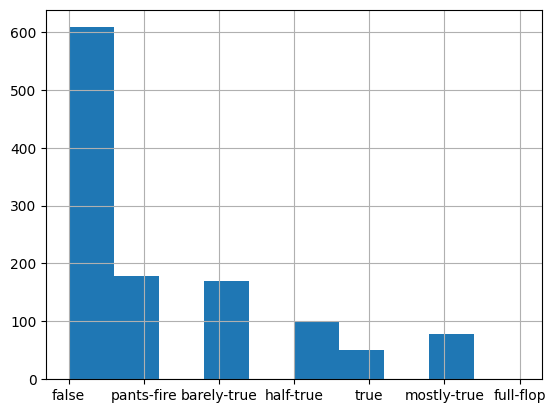

In [194]:
justinqbui_2_df['rating'].hist()

In [195]:
justinqbui_2_df['rating'].value_counts()

rating
false          608
pants-fire     178
barely-true    170
half-true      100
mostly-true     78
true            50
full-flop        1
Name: count, dtype: int64

In [196]:
justinqbui_2_df['adjusted rating'].value_counts()

adjusted rating
false         787
misleading    270
true          128
Name: count, dtype: int64

## Объединение

In [197]:
nanyy1025_df['source'] = 'nanyy1025'
nanyy1025_df['original_label_1'] = nanyy1025_df['label']
nanyy1025_df['is_fake'] = nanyy1025_df['label'].apply(lambda x: 1 if x == 'fake' else 0)
nanyy1025_df = nanyy1025_df[['text', 'is_fake', 'original_label_1', 'source']]
nanyy1025_df.head(1)

,text,is_fake,original_label_1,source
0,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,0,real,nanyy1025


In [198]:
justinqbui_1_df['source'] = 'justinqbui_1'
justinqbui_1_df['original_label_1'] = justinqbui_1_df['label']
justinqbui_1_df['is_fake'] = justinqbui_1_df['label'].apply(lambda x: True if x == False else 0).astype(int)
justinqbui_1_df = justinqbui_1_df[['text', 'is_fake', 'original_label_1', 'source']]
justinqbui_1_df.head(1)

,text,is_fake,original_label_1,source
0,Study finds 5G technology a ‘significant factor’ in higher COVID case and death rates,1,False,justinqbui_1


In [199]:
justinqbui_2_df['source'] = 'justinqbui_2'
justinqbui_2_df['original_label_1'] = justinqbui_2_df['rating']
justinqbui_2_df['original_label_2'] = justinqbui_2_df['adjusted rating']

justinqbui_2_df['is_fake'] = justinqbui_2_df['adjusted rating'].apply(lambda x: 1 if x == 'false' else 0)

justinqbui_2_df = justinqbui_2_df[['claim', 'is_fake', 'original_label_1', 'original_label_2', 'source']]
justinqbui_2_df.rename(columns={'claim': 'text'}, inplace=True)
justinqbui_2_df.head(1)

,text,is_fake,original_label_1,original_label_2,source
0,"Deaths from vaccines have totaled 1,621 from Johnson & Johnson, 4,799 from Moderna, 13,039 from Pfizer and 73 from unknown vaccines. And this is an undercount because “only 1% of deaths are reported.”",1,false,false,justinqbui_2


In [200]:
combined_df = pd.concat([nanyy1025_df, justinqbui_1_df, justinqbui_2_df], ignore_index=True)

In [201]:
combined_df.sample(5)

,text,is_fake,original_label_1,source,original_label_2
8333,President Giammattei said that the country has 10000 COVID-19 tests.,1,fake,nanyy1025,NaN
13525,Emmanuel Mudiay tested positive for COVID-19,1,False,justinqbui_1,NaN
9417,Some states are handing out fines for #COVID rule breakers. https://t.co/v6NUtFtfRF,0,real,nanyy1025,NaN
12824,"Dr. Anthony Fauci said, “As soon as a COVID-19 vaccine is manufactured, it must be delivered to healthcare professionals for immediate human injection. Proper studies can be done later.”",1,False,justinqbui_1,NaN
5824,US hits another grim coronavirus milestone ⁦@POTUS⁩ ⁦@realDonaldTrump⁩ ⁦@GovPhilScott⁩ ⁦@DaveZuckermanVT⁩ Once again I will inform you that the viral infection is completely controllable with N- acetylcysteine. legal responsibility https://t.co/HoOnSQ42ZU,1,fake,nanyy1025,NaN


In [202]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14928 entries, 0 to 14927
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              14928 non-null  object
 1   is_fake           14928 non-null  int64 
 2   original_label_1  14928 non-null  object
 3   source            14928 non-null  object
 4   original_label_2  1185 non-null   object
dtypes: int64(1), object(4)
memory usage: 583.3+ KB


In [203]:
combined_df['original_label_1'].value_counts()

original_label_1
real           5600
fake           5100
False          2929
false           608
pants-fire      178
barely-true     170
True            114
half-true       100
mostly-true      78
true             50
full-flop         1
Name: count, dtype: int64

In [204]:
combined_df['is_fake'].value_counts()

is_fake
1    8816
0    6112
Name: count, dtype: int64

## Синтетика данных

In [205]:
negative_file = DATA_SYNTHETIC / 'negative_text.txt'
positive_file = DATA_SYNTHETIC / 'positive_text.txt'

def create_dataframe_from_file(file_path: Path, is_fake_label: int) -> pd.DataFrame:
    data = []
    with file_path.open('r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                data.append({'text': line, 'is_fake': is_fake_label})
    
    return pd.DataFrame(data)

negative_df = create_dataframe_from_file(negative_file, is_fake_label=1)
positive_df = create_dataframe_from_file(positive_file, is_fake_label=0)

synthetic_df = pd.concat([negative_df, positive_df], ignore_index=True)

In [206]:
synthetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     1194 non-null   object
 1   is_fake  1194 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.8+ KB


In [207]:
synthetic_df.sample(5)

,text,is_fake
1027,"COVID-19 has caused millions of deaths worldwide, with a disproportionate impact on countries with limited healthcare infrastructure. Global vaccination efforts aim to reduce this disparity.",0
1069,"COVID-19 is not spread through food or food packaging, according to WHO. The primary transmission route is through respiratory droplets and close contact. However, good hygiene practices, such as washing hands before eating, are recommended. There is no evidence linking COVID-19 to foodborne transmission.",0
1041,Schools and workplaces have adopted hybrid models to reduce COVID-19 risks. Remote learning and working have become more widespread.,0
92,People with specific astrological signs are less likely to contract the virus.,1
838,Most vaccine-related injuries go unreported to protect pharmaceutical companies.,1


# Общий датафрейм

In [208]:
synthetic_df['source'] = 'synthetic'
final_df = pd.concat([combined_df, synthetic_df], ignore_index=True)
final_df.to_excel(DATA_PATH / 'covid_vaccine_fake.xlsx', index=False)

In [226]:
final_df['is_fake'].value_counts()

is_fake
1    9665
0    6457
Name: count, dtype: int64

In [209]:
final_df.sample(10)

,text,is_fake,original_label_1,source,original_label_2
14627,“Ultraviolet Radiation is administered into the body as a disinfectant to kill bacteria and viruses and this has been used for a while now.”,1,false,justinqbui_2,false
46,The top 5 States with high Active Caseload are also the ones which are presently reporting a high level of recoveries. https://t.co/hOWhFx5wPe,0,real,nanyy1025,NaN
10729,CDC data shows more children will die from the COVID-19 vaccine than virus,1,False,justinqbui_1,NaN
2166,A picture shows an eight-year-old boy infected with coronavirus. Prayers and shares on Facebook will help him.,1,fake,nanyy1025,NaN
14100,"""They’re unable to administer vaccines if the lockdown ends because the emergency ends with it.”",1,false,justinqbui_2,false
13660,French parade pays tribute to China's efforts against the novel coronavirus,1,False,justinqbui_1,NaN
7366,Our daily update is published. We’ve now tracked 16.9 million tests up 441k from yesterday the 2nd-highest total we've recorded. Note that we can only track tests that a state reports. For details see: https://t.co/PZrmH4bl5Y https://t.co/BT1YANufXT,0,real,nanyy1025,NaN
8456,"@explicitgrande @ftwrharry @wolfiecindy You wear you mask all day catching viruses and bacteria. Keeping it warm and moist by breathing body temperature breath on it. Lovely breeding ground for bacteria. Leave them in your car, again nice and warm. Don't wash your hands when you take them up and down. Masks are shit.",1,fake,nanyy1025,NaN
12079,190 countries have pre-booked Bharat Biotech COVID vaccine Covaxin,1,False,justinqbui_1,NaN
12603,Nokia is giving away 2000 phones amid the COVID-19 crisis.,1,False,justinqbui_1,NaN


In [213]:
import re

# Функция для очистки текста
def clean_text(text):
    text = re.sub(r'#\S+', '', text)  # Удаление хэштегов
    text = re.sub(r'@\S+', '', text)  # Удаление упоминаний
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Удаление ссылок
    return text.strip()  # Удаление лишних пробелов

final_df['text'] = final_df['text'].apply(clean_text)

In [225]:
final_df.sample(10)

,text,is_fake,original_label_1,source,original_label_2
2625,"???Breaking UK Prepares For Full Lockdown After Hundreds Of New Cases ??"" Wuhan Super Virus Updates.??�",1,fake,nanyy1025,NaN
10538,Wearing a mask can prevent transmission of Covid-19,1,fake,nanyy1025,NaN
13482,Video shows Jack Ma praising China’s response to COVID-19 in speech,1,False,justinqbui_1,NaN
12719,COVID-19 vaccine will kill 50 million Americans,1,False,justinqbui_1,NaN
8109,season is here. will rise again. But what about ? Can mosquitoes spread ? We,1,fake,nanyy1025,NaN
7122,Yesterday our laboratories completed 4162 tests bringing the total number of tests completed to date to 275852.⁣,0,real,nanyy1025,NaN
3191,Transport Sec Grant Shapps says 'it's very important we don't end up in the position of France and Spain' who've seen a spike in cases as he arrives at a cabinet meeting ahead of the PM's announcement on new national restrictions.,0,real,nanyy1025,NaN
14824,“Italy has decided not to treat their elderly for this virus.”,0,barely-true,justinqbui_2,misleading
8715,Nevada had never reported more than 500 cases in a day. Today the state reported almost 1100. The positive rate and hospitalizations in the state are rising too.,0,real,nanyy1025,NaN
14858,The health insurance industry has “agreed to waive all co-payments for coronavirus treatments.”,1,false,justinqbui_2,false


In [215]:
final_df.to_excel(DATA_PATH / 'covid_vaccine_fake_clear.xlsx', index=False)